In [1]:
import numpy as np
from collections import deque

def binary_reachability(adj_list):
    """Returns a 2D array where P[i][j] = 1 if there is a path from i to j, else 0."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    def dfs(i, j):
        if P[i][j] == 1:
            return
        P[i][j] = 1
        for child in adj_list[j]:
            dfs(i, child)

    for i in range(num_nodes):
        dfs(i, i)

    return P

def normalized_path_count(adj_list):
    """Returns a 2D array where P[i][j] is the fraction of paths from i to j."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    def count_paths(i, j, memo):
        if i == j:
            return 1
        if i in memo and j in memo[i]:
            return memo[i][j]
        
        # Initialize i in memo if not exists
        memo.setdefault(i, {})

        paths = sum(count_paths(child, j, memo) for child in adj_list[i])
        memo[i][j] = paths
        return paths

    for i in range(num_nodes):
        memo = {}
        total_paths = sum(count_paths(i, k, memo) for k in range(num_nodes))
        if total_paths > 0:
            for j in range(num_nodes):
                P[i][j] = count_paths(i, j, memo) / total_paths

    return P


def inverse_shortest_path(adj_list):
    """Returns a 2D array where P[i][j] = 1/d(i, j), with d(i, j) as the shortest path length."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        queue = deque([(i, 0)])
        visited = set()

        while queue:
            node, dist = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            if node != i:
                P[i][node] = 1 / (dist + 1)

            for child in adj_list[node]:
                queue.append((child, dist + 1))

    return P

def decay_factor_over_distance(adj_list, lambda_=0.5):
    """Returns a 2D array where P[i][j] = e^(-lambda * d(i, j))."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        queue = deque([(i, 0)])
        visited = set()

        while queue:
            node, dist = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            if node != i:
                P[i][node] = np.exp(-lambda_ * dist)

            for child in adj_list[node]:
                queue.append((child, dist + 1))

    return P

def weighted_path_contribution(adj_list):
    """Returns a 2D array where P[i][j] is the sum of 1/d(i,j) over all paths from i to j."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    def dfs(i, j, depth):
        if i == j:
            return 1 / max(1, depth)
        return sum(dfs(child, j, depth + 1) for child in adj_list[i])

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                P[i][j] = dfs(i, j, 0)

    return P

def heat_diffusion_model(adj_list):
    """Returns a 2D array where P[i][j] follows a heat diffusion model: e^(-d(i,j))."""
    return decay_factor_over_distance(adj_list, lambda_=1.0)

def random_walk_influence(adj_list, lambda_=0.85):
    """Returns a 2D array where P[i][j] represents influence spread through a random walk."""
    num_nodes = len(adj_list)
    P = np.zeros((num_nodes, num_nodes))

    def walk(i, j, prob):
        if i == j:
            return prob
        if not adj_list[i]:
            return 0
        spread = prob * lambda_ / len(adj_list[i])
        return sum(walk(child, j, spread) for child in adj_list[i])

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                P[i][j] = walk(i, j, 1)

    return P

def eigenvector_centrality_influence(adj_list):
    """Returns a 2D array where P[i][j] is based on eigenvector centrality of nodes."""
    num_nodes = len(adj_list)
    A = np.zeros((num_nodes, num_nodes))

    for i, children in enumerate(adj_list):
        for child in children:
            A[i][child] = 1

    eigenvalues, eigenvectors = np.linalg.eig(A)
    centrality = np.abs(eigenvectors[:, np.argmax(eigenvalues.real)])

    P = np.outer(centrality, centrality) / np.max(np.outer(centrality, centrality))
    return P

# Example adjacency list (DAG)
children = [[3], [3, 4, 5], [5], [6], [6, 7], [7], [8, 9], [8, 9], [], []]

# Compute propagation coefficients using each method
P_binary = binary_reachability(children)
P_path_count = normalized_path_count(children)
P_inverse = inverse_shortest_path(children)
P_decay = decay_factor_over_distance(children, lambda_=0.5)
P_weighted_path = weighted_path_contribution(children)
P_heat = heat_diffusion_model(children)
P_random_walk = random_walk_influence(children, lambda_=0.85)
P_eigenvector = eigenvector_centrality_influence(children)

# Print results
print("Binary Reachability:\n", P_binary)
print("Normalized Path Count:\n", P_path_count)
print("Inverse Shortest Path:\n", P_inverse)
print("Decay Factor Over Distance:\n", P_decay)
print("Weighted Path Contribution:\n", P_weighted_path)
print("Heat Diffusion Model:\n", P_heat)
print("Random Walk Influence:\n", P_random_walk)
print("Eigenvector Centrality Influence:\n", P_eigenvector)


Binary Reachability:
 [[1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Normalized Path Count:
 [[0.2        0.         0.         0.2        0.         0.
  0.2        0.         0.2        0.2       ]
 [0.         0.0625     0.         0.0625     0.0625     0.0625
  0.125      0.125      0.25       0.25      ]
 [0.         0.         0.2        0.         0.         0.2
  0.         0.2        0.2        0.2       ]
 [0.         0.         0.         0.25       0.         0.
  0.25       0.         0.25       0.25      ]
 [0.         0.         0.         0.         0.14285714 0.
  0.14285714 0.14285714 0.28571429 0.28571429]
 [0.         0.         0.         0.         0.         0.25
  0.         0.25    

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
from gurobipy import Model, GRB

def minimize_cost(c, d, p, q, V, r, budget, g):
    num_nodes = len(d)
    num_safeguards = len(q)
    num_levels = len(c[0])
    implemented_safeguards = np.full((num_nodes, num_safeguards, num_levels), False, dtype=bool)

    # Initialize Gurobi model
    model = Model("Minimize_Cost")
    
    # Define decision variables
    u = model.addVars(num_nodes, num_safeguards, num_levels, vtype=GRB.BINARY, name="u")
    v = model.addVars(num_nodes, num_safeguards, num_levels, lb=0, name="v")
    W = model.addVars(num_nodes, lb=0, name="W")
    Z = model.addVars(num_nodes, lb=0, name="Z")
    
    # Constraints
    for i in range(num_nodes):
        for j in range(num_safeguards):
            model.addConstr(sum(u[i, j, l] for l in range(num_levels)) == 1)
    
    for i in range(num_nodes):
        model.addConstr(sum(v[i, 0, l] for l in range(num_levels)) == V[i])
    
    for i in range(num_nodes):
        for j in range(num_safeguards):
            for l in range(num_levels):
                model.addConstr(v[i, j, l] <= u[i, j, l])
    
    for i in range(num_nodes):
        for j in range(num_safeguards - 1):
            model.addConstr(sum(r[i][j][l] * v[i, j, l] for l in range(num_levels)) == sum(v[i, j + 1, l] for l in range(num_levels)))
    
    for i in range(num_nodes):
        model.addConstr(W[i] == sum(r[i][num_safeguards - 1][l] * v[i, num_safeguards - 1, l] for l in range(num_levels)))
    
    # Budget constraint
    model.addConstr(sum(c[j][l] * u[i, j, l] for i in range(num_nodes) for j in range(num_safeguards) for l in range(num_levels)) <= budget)
    
    # Propagation constraint
    for i in range(num_nodes):
        propagated_vulnerability = sum(g[h, i] * W[h] for h in range(num_nodes) if g[h, i] > 0)
        model.addConstr(Z[i] >= propagated_vulnerability + W[i])
    
    # Objective function
    model.setObjective(
        sum(c[j][l] * u[i, j, l] for i in range(num_nodes) for j in range(num_safeguards) for l in range(num_levels)) +
        sum(p[i] * d[i] * Z[i] for i in range(num_nodes)), GRB.MINIMIZE
    )
    
    # Solve the problem
    model.optimize()

    print("Status:", model.Status)
    print("Final Decision Variables:")
    for i in range(num_nodes):
        for j in range(num_safeguards):
            for l in range(1, num_levels):  # Skip l=0 since it's always 1 due to constraint
                if u[i, j, l].X > 0:
                    print(f"u[{i}][{j}][{l}] = {u[i, j, l].X}")
                    implemented_safeguards[i,j,l] = True
    
    final_safeguards = np.argwhere(implemented_safeguards)
    
    # Print results
    if model.status == GRB.OPTIMAL:
        print("Optimal Solution Found")
        cybersecurity_investment = sum(c[j][l] * u[i, j, l].x for i in range(num_nodes) for j in range(num_safeguards) for l in range(num_levels))
        cybersecurity_gained = sum(p[i] * d[i] * V[i] * (1 - np.prod([sum(r[i][j][l_prime] * u[i, j, l_prime].x for l_prime in range(num_levels)) for j in range(num_safeguards) for l in range(num_levels)])) for i in range(num_nodes))
        cybersecurity_value = cybersecurity_gained - cybersecurity_investment
        cybersecurity_ratio = cybersecurity_gained / cybersecurity_investment if cybersecurity_investment > 0 else 0
        minimized_value = model.objVal
        print("Cybersecurity Investment:", cybersecurity_investment / 1000)
        print("Cybersecurity Value:", cybersecurity_value / 1000)
        print("Cybersecurity Ratio:", cybersecurity_ratio)
        print("Minimized Value of E:", minimized_value / 1000)
        print("Time taken for optimization (CPU seconds):", model.Runtime)
        print("Final Safeguards:")
        for i, j, l in final_safeguards:
            print((i + 1, j + 1, l))

        return cybersecurity_investment, cybersecurity_value, cybersecurity_ratio, minimized_value, final_safeguards, model.Runtime
    else:
        print("No optimal solution found.")
        return None, None, None, None, None, None


def calculate_r(V, q, c):
    # Initialize r as a 3D array
    num_nodes = len(V)
    num_safeguards = len(q)
    num_levels = len(c[0])  # Assuming all safeguards have the same number of levels
    r = np.zeros((num_nodes, num_safeguards, num_levels))

    # Calculate r_ijl for each node, safeguard, and level
    for i in range(num_nodes):
        for j in range(num_safeguards):
            for l in range(num_levels):
                r[i][j][l] = V[i] ** (q[j] * c[j][l])
    # print(r)
    return r


c_light_temp = [10, 20, 10, 35, 20, 10, 50, 45, 10, 30, 15, 40, 10, 60, 62, 58, 20, 40, 26, 10]
c_light = [value * 1000 for value in c_light_temp]
c_medium = [5 * cost for cost in c_light]
c_strong = [10 * cost for cost in c_light]
c = [[0, c_light[i], c_medium[i], c_strong[i]] for i in range(len(c_light))]
q_temp = [6.09209, 1.89873, 9.21892, 9.57156, 1.05726, 7.14106, 5.51532, 2.63135, 3.49604, 4.07247, 6.65212, 5.75807, 9.42022, 3.63525, 0.0308876, 7.55598, 4.50103, 1.70122, 7.87748, 8.37808]
q = [value * 1e-5 for value in q_temp]
p = [0.35, 0.40, 0.35, 0.25, 0.40, 0.25, 0.55, 0.55, 0.75, 0.75]
d_temp = [450, 1500, 550, 300, 1200, 350, 2500, 2500, 10000, 10000]
d = [value * 1000 for value in d_temp]
V = [0.6713, 0.7705, 0.6691, 0.5067, 0.7799, 0.5282, 0.8976, 0.8821, 0.9772, 0.9939]
# Define the adjacency matrix for g (replace the values with your specified probabilities)
g_options = [P_binary, P_path_count, P_inverse, P_decay, P_weighted_path, P_random_walk]
# g = np.zeros((len(c_light), len(c_light)))
# g[0,3] = 1.0
# g[1,3] = 4/7
# g[1,4] = 5/7
# g[1,5] = 4/7
# g[2,5] = 1.0
# g[3,6] = 1.0
# g[4,6] = 0.5
# g[4,7] = 0.5
# g[5,7] = 1.0
# g[6,8] = 0.5
# g[6,9] = 0.5
# g[7,8] = 0.5
# g[7,9] = 0.5

# Calculate r
r = calculate_r(V, q, c)
# budgets = range(10, 151, 10)
# budgets = [500, 1000, 2500, float('inf')]
# budgets = [500, float('inf')]
budget = float('inf')

cybersecurity_investments = []
cybersecurity_values = []
cybersecurity_ratios = []
minimized_values = []
cpu_times = []
safeguards = []

for g in g_options:
    print("Budget =", budget)
    
    # Solve the optimization problem and collect results
    investment, value, ratio, minimized_value, final_safeguards, cpu_time = minimize_cost(c, d, p, q, V, r, budget*1000, g)
    cybersecurity_investments.append(investment)
    cybersecurity_values.append(value)
    cybersecurity_ratios.append(ratio)
    minimized_values.append(minimized_value)
    safeguards.append(final_safeguards)
    cpu_times.append(cpu_time)
    print()

print("Budget:")
print(budget)
print("Objective Function Minimised value E:")
print(minimized_values)
print("Investment C:")
print(cybersecurity_investments)
print("CV")
print(cybersecurity_values)
print("CR")
print(cybersecurity_ratios)
print("Final Safeguards:")
print(safeguards)




Budget = inf
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Fedora Linux 41 (Workstation Edition)")

CPU model: AMD Ryzen 5 7430U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1221 rows, 1620 columns and 4659 nonzeros
Model fingerprint: 0x1c224a27
Variable types: 820 continuous, 800 integer (800 binary)
Coefficient statistics:
  Matrix range     [1e-13, 6e+05]
  Objective range  [1e+04, 8e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+100]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 259 rows and 258 columns
Presolve time: 0.14s
Presolved: 962 rows, 1362 columns, 3436 nonzeros
Variable types: 760 continuous, 602 integer (602 binary)
Found heuristic solution: objective 1.151789e+08
Found heuristic solution: objective 7.357659e+07
Found heuristic solution: objective 

Algorithms:
['Binary', 'Path Count', 'Inverse', 'Decay', 'Weighted Path', 'Random Walk']
Objective Function Minimised value E:
[11706044.22880425, 11289393.518889006, 8696529.998605661, 8728645.749948313, 8939416.22288432, 8693312.18445932]
Investment C:
[6710000.0, 6305000.0, 4900000.0, 4940000.0, 5150000.0, 4900000.0]
CV
[np.float64(11635873.99138192), np.float64(12040873.860467553), np.float64(13335204.319944423), np.float64(13295204.364400193), np.float64(13085204.386753932), np.float64(13335204.293662027)]
CR
+---------------+---------------+------------------+----------------------------+
| Algorithm     |   Minimized E |   Investment (C) |   Cybersecurity Value (CV) |
+===============+===============+==================+============================+
| Binary        |   1.1706e+07  |        6.71e+06  |                1.16359e+07 |
+---------------+---------------+------------------+----------------------------+
| Path Count    |   1.12894e+07 |        6.305e+06 |                1.

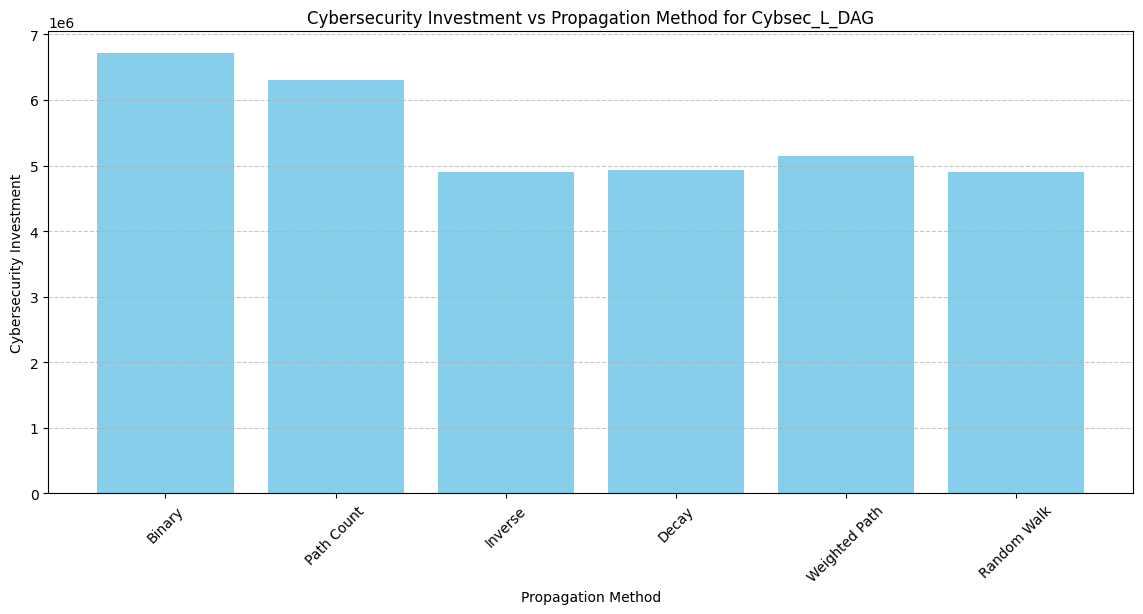

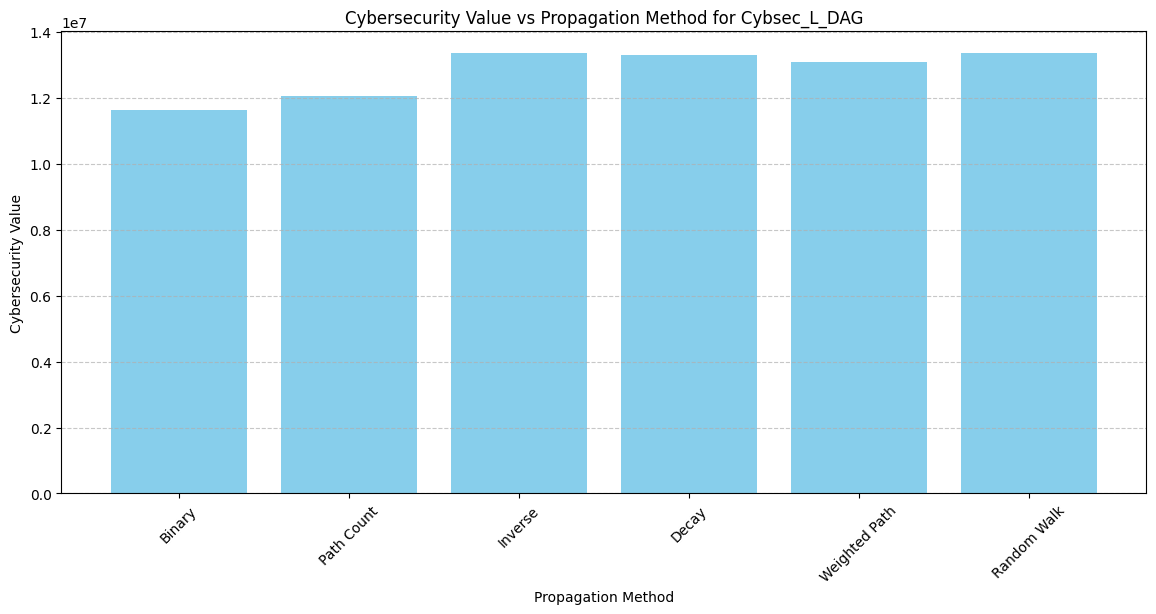

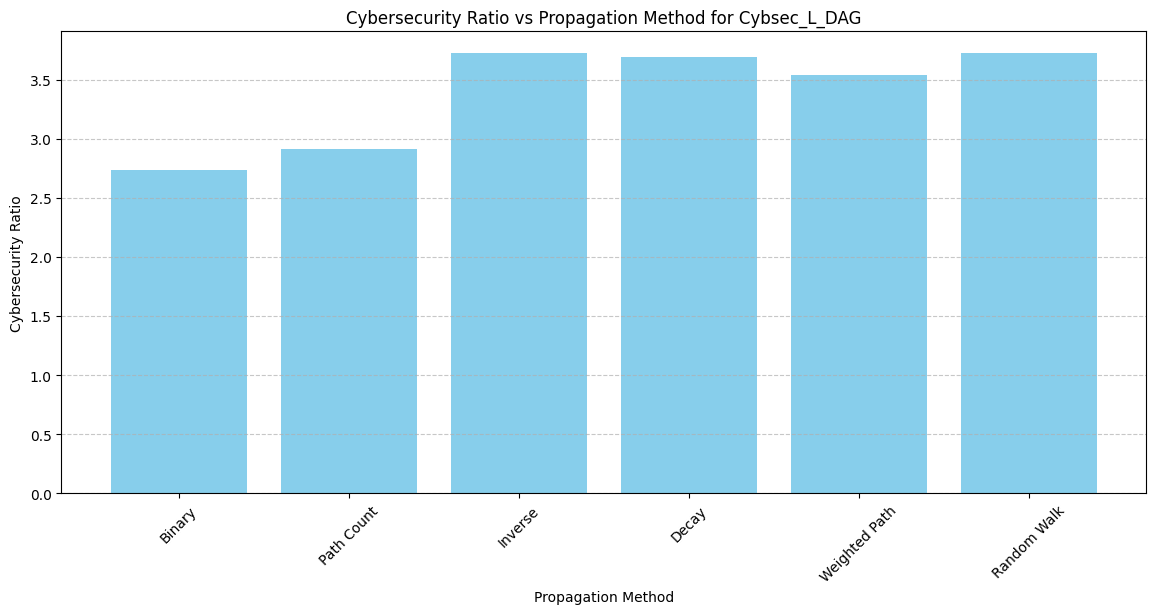

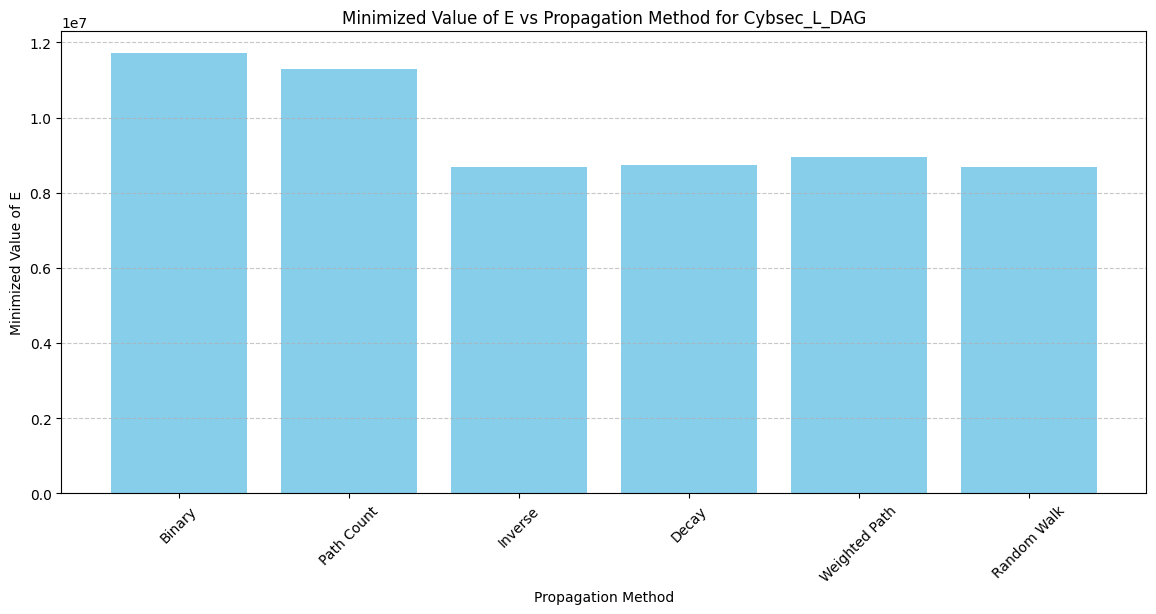

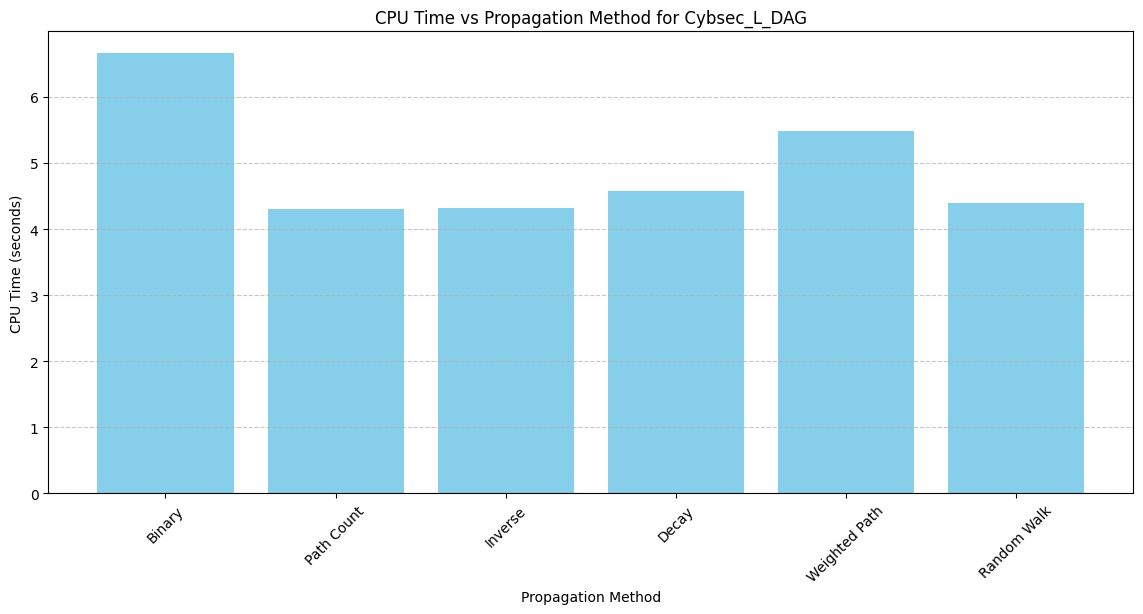

In [14]:
import matplotlib.pyplot as plt
from tabulate import tabulate

options = ["Binary", "Path Count", "Inverse", "Decay", "Weighted Path", "Random Walk"]

print("Algorithms:")
print(options)
print("Objective Function Minimised value E:")
print(minimized_values)
print("Investment C:")
print(cybersecurity_investments)
print("CV")
print(cybersecurity_values)
print("CR")

# Create table
table = zip(options, minimized_values, cybersecurity_investments, cybersecurity_values)
headers = ["Algorithm", "Minimized E", "Investment (C)", "Cybersecurity Value (CV)"]

# Print formatted table
print(tabulate(table, headers=headers, tablefmt="grid"))

# Define bar width and figure size
figsize = (14, 6)  # Increase width to prevent label overlap
bar_color = 'skyblue'  # Consistent bar color
rotation_angle = 45  # Rotate x-axis labels for better readability

# Cybersecurity Investment
plt.figure(figsize=figsize)
plt.bar(options, cybersecurity_investments, color=bar_color)
plt.title('Cybersecurity Investment vs Propagation Method for Cybsec_L_DAG')
plt.xlabel('Propagation Method')
plt.ylabel('Cybersecurity Investment')
plt.xticks(rotation=rotation_angle)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cybersecurity Value
plt.figure(figsize=figsize)
plt.bar(options, cybersecurity_values, color=bar_color)
plt.title('Cybersecurity Value vs Propagation Method for Cybsec_L_DAG')
plt.xlabel('Propagation Method')
plt.ylabel('Cybersecurity Value')
plt.xticks(rotation=rotation_angle)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cybersecurity Ratio
plt.figure(figsize=figsize)
plt.bar(options, cybersecurity_ratios, color=bar_color)
plt.title('Cybersecurity Ratio vs Propagation Method for Cybsec_L_DAG')
plt.xlabel('Propagation Method')
plt.ylabel('Cybersecurity Ratio')
plt.xticks(rotation=rotation_angle)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Minimized Value of E
plt.figure(figsize=figsize)
plt.bar(options, minimized_values, color=bar_color)
plt.title('Minimized Value of E vs Propagation Method for Cybsec_L_DAG')
plt.xlabel('Propagation Method')
plt.ylabel('Minimized Value of E')
plt.xticks(rotation=rotation_angle)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# CPU Time
plt.figure(figsize=figsize)
plt.bar(options, cpu_times, color=bar_color)
plt.title('CPU Time vs Propagation Method for Cybsec_L_DAG')
plt.xlabel('Propagation Method')
plt.ylabel('CPU Time (seconds)')
plt.xticks(rotation=rotation_angle)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
